# Introdução à linguagem Python
## MBA em Ciência de Dados                                                              Universidade de Fortaleza

### Professor Erneson A. Oliveira
### Aluno : Marcelo Antônio Albuquerque e Souza

### Projeto : É possível comparar ideologias a partir de tweets ? 
### Objeto de análise : tweets do ex-presidente Luis Inácio Lula da Silva e do presidente Jair Bolsonaro 

### Abordagem : Extração/tratamento das palavras para análise númerica e gráfica
### Metodologia:
####   1. Tratamento do texto via programa
####   1.1. Remoção de símbolos
####   1.2. Remoção de stopwords: risco; Remover palavras curtas ?
####   1.3. Remoção de hashtags e referências
####   2. Análise numérico-gráfica
####   2.1. Contagem de palavras
####   2.2. Comparativo de tema político de palavras
####   2.3. Histograma comparativo dos objetos  

<br><font size = "3" color="#000000"><strong>1.Tratamento do texto via programa</strong></font><br><br>

<font size = "2" color="#4F4F4F">Limpeza de texto : utilizadas lista de stopwords em português baixada do Github que foi editada para remover palavras potencialmente úteis para o contexto, tais como 'direita', 'esquerda', 'fazer', etc.<br><br>
Também houve a remoção de caracteres especiais, caracteres acentuados. Hashtags e referências também foram desconsideradas, somente palavras iniciadas com letras entraram na lista do array.<br><br>
A palavra 'JAIR' está sendo transformada em 'BOLSONARO' ja que irá se referir ao próprio. Já Lula só é referenciado como 'LULA'.<br><br>
Na gravação do arquivo CSV foi discriminado o codec UTF8 pois sem essa informação estava apresentando erro de leitura na seção seguinte.<br><br>

</font><br>

In [1]:
#### MBA em Ciência de Dados - Módulo Programação em Python ####
## Autor : Marcelo Albuquerque
## Início de programação : 06/12/21
## Fim de programação : 23/12/21
#versao com dois arrays (palavras e quantidades) unificando no final para gerar arquivo csv
#Gera dois arrays com hashtags e referências

import json
import numpy as np
import pandas as pd
from datetime import datetime

#Inclui as palavras no array aPalavras caso seja nova ou incrementa a quantidade no array aQuantidade
def tratapalavra(palavra):
   
    
    try:
        iIndice = aPalavras.index(palavra)
        aQuantidade[iIndice]=aQuantidade[iIndice]+1
        result = iIndice    
    except:
        aPalavras.append(palavra)    
        aQuantidade.append(1) 
        result = 0
        
    return result

######################### trata cada arquivo ##############################

def tratatweet(pNome):
    
    sArquivojson = pNome+'.json'
    sArquivoCSV =  pNome+'.csv'
    
    characters = "\"'!?-.;:,\(\)“|”*"
    sListaAlfa = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    #define stopwords que serão utilizadas na rotina, caracteres que serao eliminados e 
    with open("stopwords.txt", "r") as tf:
        stopwords = tf.read() 
    
    with open(sArquivojson,'r') as f:
        d=json.load(f)

    print("\nTotal de tweets de "+pNome+" : ",len(d))    
        
    for i in range(len(d)):

        #Extrair as palavras
        sTexto = d[i]['full_text']
        sTexto = sTexto.upper()
        sTexto = sTexto.replace("\n","")
        
        #eliminação de caracteres especiais
        for x in range(len(characters)):
            sTexto = sTexto.replace(characters[x],"")
            
        #eliminação de letras acentuadas    
        sTexto = sTexto.replace("Á","A")
        sTexto = sTexto.replace("Â","A")
        sTexto = sTexto.replace("Ã","A")
        sTexto = sTexto.replace("À","A")
        sTexto = sTexto.replace("Ê","E")
        sTexto = sTexto.replace("É","E")
        sTexto = sTexto.replace("Í","I")
        sTexto = sTexto.replace("Ó","O")
        sTexto = sTexto.replace("Ô","O")
        sTexto = sTexto.replace("Õ","O")
        sTexto = sTexto.replace("Ú","U")
        sTexto = sTexto.replace("Ç","C")
        
        aLista = sTexto.split(" ")
        
        if i == 0:
            print("\nPrimeiros 10 tweets de ",pNome)
        
        if i <= 10:
            print(d[i]['full_text'])

        sGrupo = ""
        
        for j in (range(len(aLista))):
       
            sPalavra = aLista[j]
            sPalavra = sPalavra.strip()
        
            if not (sPalavra.lower() in stopwords or (len(sPalavra)==1)):
                if (sPalavra.isalnum()) and (sListaAlfa.rfind(sPalavra[0:1])>=0):
                    if sPalavra=='JAIR':
                        sPalavra = 'BOLSONARO'
                    iResultado = tratapalavra(sPalavra)
            sGrupo = sGrupo + " " + sPalavra
            #endif (len(sPalavra)>3):
        
        #endfor
        print
    #endfor 
    
    return 0

######################### Programa principal ##############################

#Declarar array que irá armazenar a lista

#Declarar uma lista com as palavras e o total de ocorrencias de cada uma,
#['palavra',999]
aPalavras = []
aQuantidade = [] 

#processa tweets de Lula
tratatweet('LulaOficial')

#juntando os dois arrays em um array bidimensional
aFinalLula = np.column_stack((aPalavras,aQuantidade))

#processa tweets do Bolsonaro
aPalavras = []
aQuantidade = [] 

tratatweet('jairbolsonaro')

#juntando os dois arrays em um array bidimensional
#testar com zip
aFinalBozo = np.column_stack((aPalavras,aQuantidade)) 

#print(aFinalLula)
#print(aFinalBozo)

#carga em arquivo CSV. Com

with open('palavras.csv', 'w',encoding='utf8') as f:
    f.write("Candidato;Palavra;Quantidade;Percentual;Acumulado")
    f.write("\n")
    for j in range(len(aFinalLula)):
       ##elimina qualquer sujeira remanescente da extração das palavras
        try:
            f.write("Lula;"+aFinalLula[j][0]+";"+str(aFinalLula[j][1])+";0;0") 
            f.write("\n")
        except: 
            print(aFinalLula[j][0])
            
    for j in range(len(aFinalBozo)):
       ##elimina qualquer sujeira remanescente da extração das palavras
        try:
            f.write("Bolsonaro;"+aFinalBozo[j][0]+";"+str(aFinalBozo[j][1])+";0;0") 
            f.write("\n")
        except: 
            print(aFinalBozo[j][0])            


    f.close() 
    
print("\nNesse ponto temos um arquivo csv com as palavras e quantidades por candidato")     
print("\nA próxima etapa será carregar um dataframe com base no arquivo csv para realização da análise numérica")  
print("\nFim de processo às : "+str(datetime.now()))    


Total de tweets de LulaOficial :  14961

Primeiros 10 tweets de  LulaOficial
"O presidente Lula vai dar um passeio nessa eleição. Ganha no primeiro turno" - @Haddad_Fernando, vice na chapa, em coletiva de imprensa sobre a decisão da @ONUBrasil que assegura o direito de Lula ser candidato.
@dilmabr afirma que aqueles que querem acabar com ministérios, provavelmente acabarão com o das mulheres, dos negros e dos direitos humanos
O PT deu cidadania para as mulheres fazerem política, legalizou as domésticas, aprovou as cotas
Continuo sendo o lulinha paz e a amor. A gente não pode deitar com raiva nem acordar com raiva. #LulanoRadio
Olhando as últimas pesquisas, vemos que a única coisa que temos que fazer é acreditar em nós mesmos.
https://t.co/gwgzETBi8S
“Chico Buarque, Carol Proner e Celso Amorim falam sobre a visita ao ex-presidente Lula nessa quinta-feira: sem Lula Livre não há democracia.”

Vídeo: Ricardo Stuckert  https://t.co/yEzXLg1jtQ
Acompanhe ao vivo a cerimônia de entrega do dou

<font size = "3" color="#000000">Análise visual dos tweets exemplo :</font><br><br>
<font size = "2" color="#4F4F4F">Numa visão rápida os tweets de Lula parecem mais bem escritos e sempre incluindo o nome do político e de seus aliados, seja literal, em hashtags ou referência - possivelmente escritos por uma assessoria.<br>
Os tweets de Bolsonaro parecem mais 'autênticos' - escritos de próprio punho ? Muitas piadas, gírias, ironias e emojis.<br>
</font><br>


 

<font size = "3" color="#000000">Carga do csv :<br>
<font size = "2" color="#4F4F4F"><br>
Carga do csv em dataframe do Pandas para facilitar a manuseio das informações.<br>
O Dataframe será ordenado pela ocorrencia de palavras e com a totalização do total de palavras de cada candidato foram preenchidas as colunas com o percentual da palavra e o percentual acumulado. Isso foi feito para uma comparação pelo percentual e não pela quantidade, ja que o total de tweets de um e outro candidato é muito diverso.
<br>

</font><br>




In [2]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("palavras.csv", sep=';', encoding='utf8')

#https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/

#Ordenar por quantidade de palavras  nota : INPLACE É MUITO IMPORTANTE !
df.sort_values(by=['Quantidade'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)

#Totalizar a quantidade de palavras
nTotalLula =df.query("Candidato == 'Lula'")['Quantidade'].sum()
print("Total de palavras de Lula :",nTotalLula)

nTotalBozo =df.query("Candidato == 'Bolsonaro'")['Quantidade'].sum()
print("Total de palavras de Bolsonaro :",nTotalBozo)

#distribuir percentualmente cada palavra e adicionar o total acumulado - tentar melhorar via um unico comando
nAcumLula = 0
nAcumBozo = 0
for index, row in df.iterrows():
    if df.loc[index,'Candidato']=='Lula':
        nDivisor = nTotalLula
        nAcumLula = nAcumLula + df.loc[index,'Quantidade']
        df.loc[index,'Acumulado'] = 100*(nAcumLula/nTotalLula) 
    else:
        nDivisor = nTotalBozo
        nAcumBozo = nAcumBozo + df.loc[index,'Quantidade']
        df.loc[index,'Acumulado'] = 100*(nAcumBozo/nTotalBozo) 
        
    df.loc[index,'Percentual'] = 100*(df.loc[index,'Quantidade']/nDivisor)    
    
df.head()
        
print("Fim de processo às : "+str(datetime.now()),"\nCriado o dataframe df para execução das pesquisas") 
       
     



Total de palavras de Lula : 126338
Total de palavras de Bolsonaro : 63538
Fim de processo às : 2021-12-23 16:26:32.578927 
Criado o dataframe df para execução das pesquisas


<font size = "3" color="#000000">Dataframe criado : df  </font><br>
<font size = "2" color="#4F4F4F"><br> 
Com a execução acima temos o dataframe "df" com as palavras de ambos, com o total de ocorrências, o percentual e o percentual acumulado.<br><br>
Ressalte-se que dada a diferença no número de tweets entre os dois politicos, é necessária que as comparações sejam efetuadas com base no percentual de cada palavra, e não na sua contagem absoluta.      
O código abaixo se propõe a responder alguns insigths que possam indicar viés ideológico pela contagem comparativa das palavras mais utilizadas pelos candidatos :<br>
Quantas palavras distintas cada um usou ?<br> 
Quantas palavras representam 80% da frequência de cada um ?  
Quais as 10 palavras mais usadas de cada um ?<br> 
Existe alguma coincidência ? São muito disparatadas ? 
    
<br>

</font><br>



####   2. Análise numérico-gráfica
####   2.1 Contagem de palavras

In [3]:
#Realiza a análise numérica, ou uma tentativa de...
#Tentaremos responder algumas perguntas e buscar insights para avançar no trabalho

df.head()

#Seleciona as palavras que representam 80% da frequencia acumulada
dfQtdB=[df.query("Candidato == 'Bolsonaro'").count(0),df.query("Candidato == 'Bolsonaro' & Acumulado<80.00").count(0)]
dfQtdL=[df.query("Candidato == 'Lula'").count(0),df.query("Candidato == 'Lula' & Acumulado<80.00").count(0)]


#Quantas palavra distintas cada um usou ?
print('Palavras distintas Bolsonaro :',dfQtdB[0][0])
print('\nPalavras distintas Lula :'     ,dfQtdL[0][0])

#Quantas palavras representam 80% da frequencia de cada um ?
print('\nPalavras com 80% freq acumulada Bolsonaro :',dfQtdB[1][0])
print('\nPalavras com 80% freq acumulada Lula :',dfQtdL[1][0])

#Quais as 10 palavras mais usadas por cada um ?
#tentar eliminar colunas desnecessárias
print('\nQuais as 10 palavras mais usadas por cada um ?\n')

print('Bolsonaro :')
dfB10 = df.query("Candidato == 'Bolsonaro'").head(10) 
print(dfB10.iloc[0:10,1:5])

print('\nLula :')
dfL10 = df.query("Candidato == 'Lula'").head(10) 
print(dfL10.iloc[0:10,1:5])


print("\nFim de processo às : "+str(datetime.now()))  

Palavras distintas Bolsonaro : 13534

Palavras distintas Lula : 15056

Palavras com 80% freq acumulada Bolsonaro : 3941

Palavras com 80% freq acumulada Lula : 2667

Quais as 10 palavras mais usadas por cada um ?

Bolsonaro :
          Palavra  Quantidade  Percentual  Acumulado
15160      BRASIL        1253    1.972048   1.972048
15281   BOLSONARO        1077    1.695049   3.667097
15076       TODOS         586    0.922283   4.589380
15102     GOVERNO         386    0.607510   5.196890
15189    OBRIGADO         349    0.549278   5.746168
15075      ABRACO         317    0.498914   6.245082
15729          PT         297    0.467437   6.712518
15257        PAIS         239    0.376153   7.088671
15401  PRESIDENTE         236    0.371431   7.460103
15439      SEMPRE         203    0.319494   7.779596

Lula :
        Palavra  Quantidade  Percentual  Acumulado
1          LULA        5266    4.168184   4.168184
68         PAIS        1721    1.362219   5.530403
154      BRASIL        1476   

<font size = "3" color="#000000">Análise da contagem :</font><br>
<font size = "2" color="#4F4F4F">
<b>1.</b> Lula usou mais palavras distintas que Bolsonaro. Se os tweets foram escritos por uma assessoria é esperado que o vocabulário seja mais rico. Ou pode ser por conta da base de tweets de Lula ser maior : 14.961 contra 6.704 de Bolsonaro.<br>
<b>2.</b> Interessante que mesmo com o fato acima, 80% das palavras de Bolsonaro foi contido em 3.919 palavras distintas. Os 80% de Lula foram 2.645 palavras. Talvez um indício de texto semi-padronizados ou estruturados, enquanto de Bolsonaro seriam textos mais espontâneos.<br>
<b>3.</b> Criando um 'de-para' de palavras similares podemos ver que no geral os políticos usaram grupos equivalentes, seja para falar de si, do país, do povo e do PT. Palavras emotivas de Bolsonaro não aparecem na lista de Lula. Bolsonaro citou muito o PT, partido do adversário.<br> 
<b>4.</b> Comparativo das Top #10 palavras de Bolsonaro x palavras de Lula:<br></font> 

<table border="1">
    <tr>
        <td><b>Palavras Bolsonaro</b></td>
        <td><b>Palavras Lula</b></td>
    </tr>
    <tr>
        <td>Bolsonaro </td> 
        <td>Lula</td>
    </tr>
    <tr>
        <td>País</td> 
        <td>país, Brasil</td>
    </tr>
    <tr>
        <td>Governo</td> 
        <td>Governo</td>
    </tr>
    <tr>
        <td>Todos</td>            
        <td>Povo, Gente, Voces</td>
    </tr>
    <tr>
        <td>PT</td>
        <td>PT</td>
    </tr>
    <tr>
        <td>Presidente</td> 
        <td>Presidente</td>
    </tr>
    <tr>
        <td>Obrigado, Abraço</td>  
        <td>-</td>
    </tr>
    <tr>
        <td>Sempre</td> 
        <td>-</td>
    </tr>
    <tr>
        <td>-</td>  
        <td>Vivo</td>
    </tr>
   
</table>    
    
    
</font><br>

<font size = "3" color="#000000">E se buscarmos um comparativo das 150 palavras mais faladas de cada um ?</font><br>






In [4]:
import numpy as np
#Criando duas listas com as 150 palavras mais usadas por cada um a partir do dataframe
dfB150 = df.query("Candidato == 'Bolsonaro'").head(150) 
dfL150 = df.query("Candidato == 'Lula'").head(150)  

aL150_B = list(dfB150.iloc[0:150,1])  
aL150_L = list(dfL150.iloc[0:150,1]) 

#colocando em ordem alfabética
aL150_B.sort()
aL150_L.sort()

#criando listas das exceções
aNoLula = []
aNoBozo = []

#criando lista das combinações
aAmbos=[]

print('\nDas 150 palavras mais faladas de Bolsonaro, quais Lula não falou ?')
#Listando as palavras ditas por Bolsonaro e não ditas por Lula
#Para criar a lista das palavras em comum, pode partir de qualquer um dos candidatos
for i in range(len(aL150_B)):
    try:
        iIndice = aL150_L.index(aL150_B[i])
        aAmbos.append(aL150_B[i])
    except:
        aNoLula.append(aL150_B[i])  

        
print(aNoLula)
print('\nTotal de palavras : ',len(aNoLula))  

print('\nDas 150 palavras mais faladas de Lula, quais Bolsonaro não falou ?')
#Listando as palavras ditas por Lula e não ditas por Bolsonaoro
for i in range(len(aL150_L)):
    try:
        iIndice = aL150_B.index(aL150_L[i])
    except:
        aNoBozo.append(aL150_L[i]) 
        
print(aNoBozo)
print('\nTotal de palavras : ',len(aNoBozo))  

print('\nPalavras faladas por ambos :')

print(aAmbos)
print('\nTotal de palavras : ',len(aAmbos))  


print("\nFim de processo às : "+str(datetime.now()))   


Das 150 palavras mais faladas de Bolsonaro, quais Lula não falou ?
['ABRACO', 'ACORDO', 'AGRADECO', 'AMIGOS', 'AMOR', 'APOIO', 'BOA', 'BRASILIA', 'CAMARA', 'CAMINHO', 'CANAL', 'CARINHO', 'CERTO', 'CIDADAO', 'CIDADAOS', 'COMBATE', 'COMERCIO', 'CONFIANCA', 'CORRUPCAO', 'CRESCIMENTO', 'CRIANCAS', 'DEPUTADO', 'DEPUTADOS', 'DESENVOLVIMENTO', 'DEUS', 'DIREITA', 'ECONOMICA', 'EMPREGOS', 'ENERGIA', 'ESCOLAS', 'ESQUERDA', 'ESTADOS', 'EUA', 'EXERCITO', 'FOLHA', 'FORTE', 'FRENTE', 'GENERAL', 'GOVERNOS', 'GRATO', 'HOMENAGEM', 'HUMANOS', 'INVESTIMENTOS', 'ISRAEL', 'JORNAL', 'JUNTOS', 'MAIORES', 'MEDICOS', 'MERCADO', 'MIDIA', 'MILITAR', 'MILITARES', 'MINISTERIO', 'MINISTRO', 'MISSAO', 'MUDAR', 'MULHERES', 'NACAO', 'NEWS', 'NORTE', 'OBRIGADO', 'OUTROS', 'PAISES', 'PARABENS', 'PASSADO', 'PLANO', 'POLITICOS', 'PREVIDENCIA', 'PSOL', 'PUBLICA', 'PUBLICO', 'RECURSOS', 'REDUCAO', 'REGIAO', 'SAUDE', 'SEGUIMOS', 'SEGURANCA', 'SERVICOS', 'SISTEMA', 'TURISMO', 'UNIDOS', 'VENEZUELA', 'VIOLENCIA', 'VITORIA']

T

<font size = "3" color="#000000">Análise :</font><br>
<font size = "2" color="#4F4F4F">Com uma quantidade maior de palavras se torna muito difícil realizar uma análise mais acurada. É possível observar
na lista de Bolsonaro palavras que evocam Polícia e Forças Armadas, Deus, Mercado. Já Lula parece falar de temas que envolvem pessoas,
tais como Fome, Mulheres, Trabalhador, além de possíveis referências à sua prisão, tais como Prisão, Processo, Prova.<br>
Vale notar que algumas palavras que geram muito impacto midiático não estão entre essas 150 mais faladas, tais como Aborto, Comunismo, Gay, Feminismo, Ideologia, Gênero, Marxismo.</font><br>

<font size = "3" color="#000000">Proposta de aprofundamento da análise :</font><br>
<font size = "2" color="#4F4F4F">A sugestão é realizar uma classificação dessas palavras mais utilizadas de acordo com um 'tema' político normalmente discutido na pauta política nacional. Abaixo os temas propostos seguidos de algumas palavras para exemplificar :<br>
<b>CORRUPÇÃO :</b> pauta corriqueira todos os debates. <i>Corrupção, Lava, Jato, Prisão, Preso.</i><br>
<b>SEGURANÇA :</b> pauta corriqueira todos os debates. <i>Crime, Defesa, Justiça,Polícia, Segurança</i><br>
<b>COSTUMES :</b> Deus, família, bons constumes. Essa temática passou a fazer parte do discurso político com o aumento dos evangélicos no seio da população.<i>Deus, Família, Filho.</i><br>
<b>POLÍTICA EXTERNA E MEIO AMBIENTE :</b>Pautas menos importantes para o grosso da população mas que tem um nicho na classe média.<i>EUA, Venezuela, ONU.</i><br>
<b>POLITICAS SOCIAIS E DIREITOS HUMANOS :</b>Pautas corriqueira todos os debates e mais presente no discurso de partidos de centro esquerda.<i> Crianças, Direitos, Mulheres, Povo, Social.</i><br>
<b>ECONOMIA E EMPREGO :</b> Sempre. 'É a economia, idiota', dizia o marketeiro de Bill Clinton e normalmente ocupa uma das maiores minutagens do jornalismo televiso.<i> Crescimento, Desenvolvimento, Dinheiro, Economia, Emprego.</i><br>
<b>EDUCAÇÃO E SAUDE :</b> Pauta corriqueira todos os debates.<i>Educação, Escolas, Universidades.</i><br>
<b>POLÍTICA :</b> A Política em si, o jogo político está sempre presente em todo discurso de seus agentes. São palavras do <i>metier</i> da mesma e no nosso caso referências à mídia e seus veículos.<i>Folha, Brasil, Brasília, Congresso, Globo, Governo.</i><br>
<b>RETÓRICA :</b> Palavras que geram empatia com o eleitor, seja de comunhão ou de ódio. Ou palavras que queiram indicar uma visão de futuro, ou verbos que levem a essa visão de futuro.<i>Queremos,Abraço, Bom, Carinho, Casa, Confiança, Humanos, Liberdade, Unidos, Vamos</i>.<br>
<b>PERSONALIZAÇÃO :</b> Nomes de agentes políticos ou verbos que sejam uma ação do 'eu' político falando, normalmente em primeira pessoa.<i>Bolsonaro, Lula, Seguimos, Mim, Preciso, Quero.</i><br>
Para tratar essa categorização no Python a rotina abaixo foi utilizada para criar um arquvio csv com a lista de palavras e incluídas manualmente as categorais acima para cada palavra e salvo como o arquivo TEMAS_POLITICOS.csv que será processado em conjunto com os dataframes para gerar nossos resultados para análise.


    


</font><br>

In [5]:
#Das 150 palavras mais usadas por ambos eliminar as duplicações para criar uma lista a ser classficiada pelo viés (ou tema) 
#  da palavra
#O arquivo palavras.csv foi editado para infomar manualmente na coluna 'Vies' qual seria a classificação da palavra sob 
# o aspecto político/eleitoral/ideologico :
#O arquivo editado é o TEMAS_POLITICOS.CSV que será tratado na próxima seção

aTop150 = []


#Realiza um merge entre as palavras mais faladas de cada um 
for i in range(len(aL150_B)):
    try:
        iIndice = aTop150.index(aL150_B[i])
    except:
        aTop150.append(aL150_B[i])  

for i in range(len(aL150_L)):
    try:
        iIndice =aTop150.index(aL150_L[i])
    except:
        aTop150.append(aL150_L[i]) 

with open('Classifica.csv', 'w',encoding='utf8') as f:
    f.write("Palavra;Vies")
    f.write("\n")
    for j in range(len(aTop150)):
       ##elimina qualquer sujeira remanescente da extração das palavras
        try:
            f.write(aTop150[j]+";") 
            f.write("\n")
        except: 
            print(aTop150[j])
   
print("Total de palavras : ",str(len(aTop150)))            
print("\nFim de processo às : "+str(datetime.now()))  

Total de palavras :  234

Fim de processo às : 2021-12-23 16:26:54.893734


In [6]:
#A partir das palavras classificadas pela temática iremos tabular as palavras mais faladas por ambos a fim de detectar 
#  similidares ou diferenças que possam embasar uma resposta ao questionamento do trabalho
import pandas as pd
import matplotlib.pyplot as plt

##função que retorna o lado direito de uma string
def Right(sInicio,iFim):
    
    sFinal = sInicio[len(sInicio)-iFim:len(sInicio)]
    
    return sFinal

#https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351

## histograma de barras empilhadas
def plotar(indice1,indice2) :

    aTemas = []
    aPercB = []
    aPercL = []
    for i in range(indice1,indice2):
        aTemas.append(aFinal[i][0])
        aPercB.append(aFinal[i][2])
        aPercL.append(aFinal[i][4])
    
#print(Temas)    
#print(aPercB)

    cBozo=plt.bar(aTemas, aPercB, label='Bolsonaro', width=0.5)
    cLula=plt.bar(aTemas, aPercL, label='Lula', bottom=aPercB, width=0.5)
    
    fig_size=plt.rcParams["figure.figsize"]
    fig_size[0]=18
    fig_size[1]=12
    
    plt.rcParams["figure.figsize"]=fig_size

    legend=plt.legend()
#print(c0)
    plt.show()

    return 0

## Histograma de barras laterais
def plotar2(indice1,indice2) :

    aTemas = []
    aPercB = []
    aPercL = []
    
    for i in range(indice1,indice2):
        aTemas.append(aFinal[i][0])
        aPercB.append(aFinal[i][2])
        aPercL.append(aFinal[i][4])
    
    barWidth = 0.25
 
    r1 = np.arange(len(aPercB))
    r2 = [x + barWidth for x in r1]
    #print(r1)

    cBozo=plt.bar(r1, aPercB, label='Bolsonaro', width=barWidth)
    cLula=plt.bar(r2, aPercL, label='Lula', width=barWidth)
     
    plt.xlabel('Temas do Discurso Político')
    plt.xticks([r + barWidth for r in range(len(aPercB))],aTemas)
    plt.ylabel('Percentuais')
    plt.title('Percentual das 150 palavras mais escritas nos tweets')
    
    
    fig_size=plt.rcParams["figure.figsize"]
    fig_size[0]=18
    fig_size[1]=12
    plt.rcParams["figure.figsize"]=fig_size
    
    legend=plt.legend()
    plt.show()

    return 0


##### Realiza a análise #####################################

dfTemas = pd.read_csv("TEMAS_POLITICOS.csv", sep=';')

aFinal = []
aListaFinal = []

nQuantidade_B = 0
nPercentual_B = 0.0 
nQuantidade_L = 0
nPercentual_L = 0.0

for i in range(len(dfTemas)):
#pegar a palavra e tema
    sPalavra = dfTemas.iloc[i,0]
    sTema    = dfTemas.iloc[i,1]
    
#localizar qts e percent em cada um dos candiadtos

#   Busca Bolsonaro
    sQuery = "Palavra == \'"+sPalavra+"\'"
    dfResult = dfB150.query(sQuery)

    bNoBozo = False
    bNoLula = False
    
    try:
        nQuantidade_B = dfResult.iloc[0,2]
        nPercentual_B = dfResult.iloc[0,3] 
    except:
        #print("Palavra nao localizada B ",sPalavra)
        bNoBozo = True
        
#   Busca Lula    
    sQuery = "Palavra == \'"+sPalavra+"\'"
    dfResult = dfL150.query(sQuery)
    try:
        nQuantidade_L = dfResult.iloc[0,2]
        nPercentual_L = dfResult.iloc[0,3] 
    except:
        bNoLula = True    
        
#    if bNoLula and bNoBozo:
#        print("Palavra nao localizada : ",sPalavra)
    
#se Tema existir em aFinal, somar com os valores
    try:
        iIndice = aListaFinal.index(sTema)
        aFinal[iIndice][1] = aFinal[iIndice][1] + nQuantidade_B 
        aFinal[iIndice][2] = aFinal[iIndice][2] + nPercentual_B 
        aFinal[iIndice][3] = aFinal[iIndice][3] + nQuantidade_L 
        aFinal[iIndice][4] = aFinal[iIndice][4] + nPercentual_L 
#se nao existir, adicionar os valores        
    except:
        aListaFinal.append(sTema)
        aFinal.append([sTema,nQuantidade_B,nPercentual_B,nQuantidade_L,nPercentual_L])
        #print(aFinal)
#end-for

dfTemas2= dfTemas.sort_values(by=['PALAVRA']) 

print('Visão da categorização das palavras')
dfTemas2.head(100)



Visão da categorização das palavras


,PALAVRA,TEMA
34,ABRACO,RETORICA
128,ACOES,POLITICA
104,ACOMPANHE,PERSONALIZACAO
129,ACORDO,POLITICA
35,AGRADECO,RETORICA
...,...,...
148,IMPRENSA,POLITICA
87,INTEGRA,RETORICA
189,INTERNACIONAL,POLITICA EXTERNA E MEIO AMBIENTE
18,INVESTIMENTOS,ECONOMIA E EMPREGO


In [7]:
## Visão do resultado da categorização cruzada com as palavras totalizadas

print("\nTema                                       Bolsonaro            Lula")     
print("                                         qtd       %     qtd       %")
print("--------------------------------------------------------------------")    

for i in range(len(aFinal)):
    sTitulo = aFinal[i][0] + "                                     "
    sPerc1 = "{:.2f}".format(aFinal[i][2]) 
    sPerc2 = "{:.2f}".format(aFinal[i][4]) 
    print(sTitulo[0:36]," ",Right("  "+str(aFinal[i][1]),5)," ",Right("  "+sPerc1,5)," ",Right("  "+str(aFinal[i][3]),5)," ",Right("  "+sPerc2,5))

print("\nFim de processo às : "+str(datetime.now())) 


Tema                                       Bolsonaro            Lula
                                         qtd       %     qtd       %
--------------------------------------------------------------------
CORRUPCAO                               1017    1.60    1310    1.04
COSTUMES                                 386    0.61     399    0.32
ECONOMIA E EMPREGO                      1289    2.03    2738    2.17
EDUCACAO E SAUDE                         356    0.56    1325    1.05
RETORICA                                6278    9.88   16997   13.45
PERSONALIZACAO                          2174    3.42   14550   11.52
POLITICA                                6846   10.77   20666   16.36
POLITICA EXTERNA E MEIO AMBIENTE         465    0.73    1637    1.30
POLITICAS SOCIAIS E DIREITOS HUMANOS     724    1.14    3164    2.50
SEGURANCA                                831    1.31    1813    1.44

Fim de processo às : 2021-12-23 16:27:09.555008


####   2. Análise numérico-gráfica

####   2.2. Comparativo de tema político de palavras

<font size = "3" color="#000000">Resultado do processamento</font><br>
<font size = "2" color="#4F4F4F">Acima temos uma tabela com os dados tabulados por tema político e as quantidades de palavras envolvidas e seus percentuais por candidato. Lembramos que por ser uma amostra das principais palavras utilizadas, a soma dos percentuais não será 100%.<br>
Abaixo temos essa mesma tabela disposta em gráfico de barras para melhor visualização. Foram criadas duas opções de gráfico: com barras empilhadas e barras laterais. A melhor visualização é a de barras laterais.</font><br>

####   2. Análise numérico-gráfica
####   2.3. Histograma comparativo dos objetos 

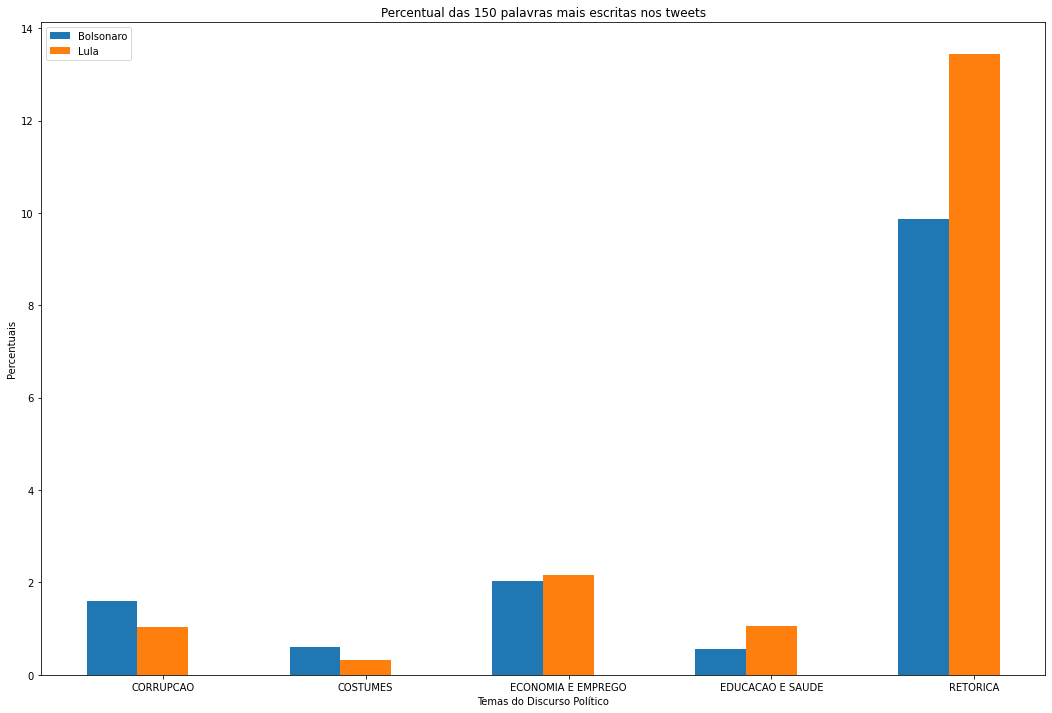

0

In [9]:
plotar2(0,5)

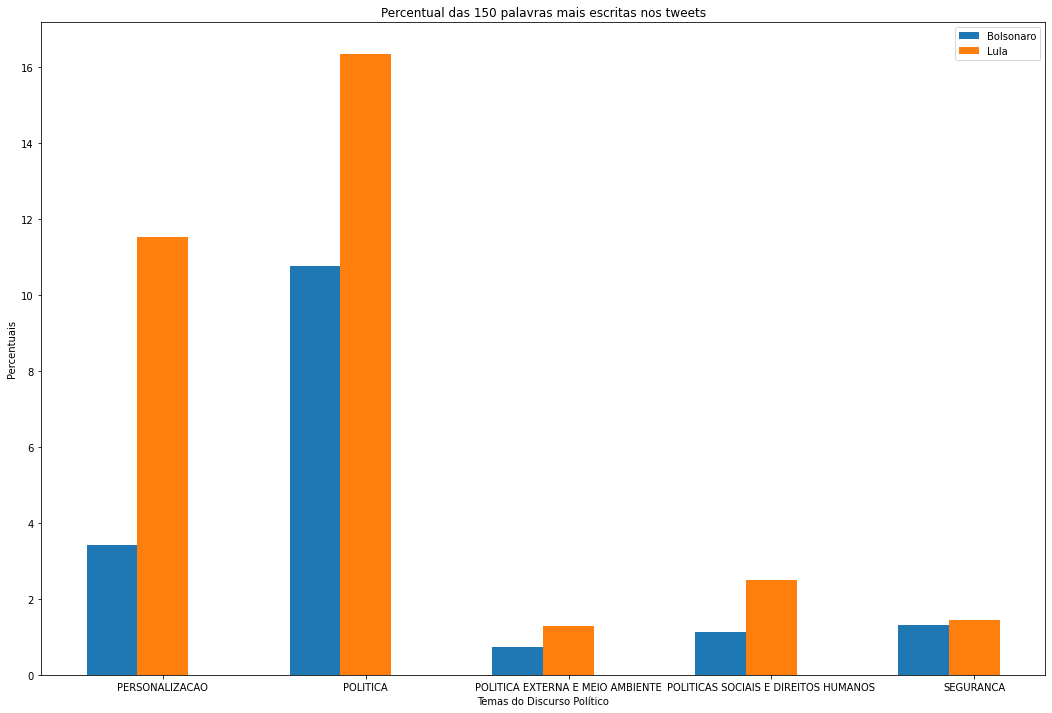

0

In [10]:
plotar2(5,10)

<font size = "3" color="#000000"> Avaliação e conclusão da abordagem por análise numérica:  </font><br>
<font size = "2" color="#4F4F4F">   
Com base nas palavras categorizadas por temas políticos temos uma visão mais ampla do resultado.<br>
Antes de começar a análise precisamos definir a que 'ideologia' estamos nos referindo. O tema é vasto e controverso, sendo um estudo desse tipo passível de inúmeros vieses a depender das simpatias político-partidárias do pesquisador.<br>
Buscando uma simplificação necessária para esse estudo, dentro da realidade nacional e do ideário político do brasileiro, a 'ideologia para o brasileiro' se divide entre 'Direita' e 'Esquerda', a <i>Direita</i> se auto-definindo, por exemplo, como 'conservadora nos costumes, liberal na economia', acreditando que um mercado com menos regras (e direitos trabalhistas) irá gerar riqueza e progresso pelo aumento da economia como todo. Defende um livre mercado e não demonstra preocupação com a participação estrangeira na economia nacional. Também defende controle dos gastos públicos para manutenção de superávits fiscais e controle da inflação. A Direita de uns tempos para cá adotou a pauta dos costumes, resumindo-o no bordão 'Deus, Pátria, Família'.<br>
A Esquerda busca melhorar indicadores sociais através de maior ação do Estado nas áreas de educação, proteção de minorias, do meio-ambiente, bem como assegurar (ou ampliar) direitos trabalhistas e intervir na economia se necessário para alavancar desenvolvimento econômico. Defende que o país seja independente tecnologicamente e precisa assegurar alto grau de independência dos demais países. Também acredita que o social não deveria ficar em segundo plano frente à questões fiscais<br>
Na economia existem os ramos 'monetaristas' x 'desenvolvimentistas' como reflexo da linha de pensamento mais 'esquerdista' ou mais 'direitista' presentes na Academia e que irá formar o pensamento dos futuros Ministros da Economia.<br>
Mas claro que o exposto acima é baseado no discurso teórico, que na prática está sujeito à criatividade dos políticos brasileiros que mudam de partido e opinião de acordo com as conveniências do momento.    
Isso posto, podemos contextualizar os gráficos à luz da ideologia conforme a explicamos.<br>
Chama a atenção o alto percentual de <b>Retórica</b> no discurso dos dois politicos. Considerando que ambos - até para terem se tornado Presidente da República - são grandes comunicadores, é um resultado esperado, estando Lula com leve dianteira.<br> 
As palavras do tema <b>Política</b> atingem percentual ainda maior, já que um líder de influência nacional precisa falar da política a maior parte de seu tempo, seja explicando algo ao eleitor (menos) ou enviando recados aos outros políticos (mais). Nesse caso, segue a tendência de Lula ser o maior usuário desse conjunto de palavras.<br> 
Também sem surpresa, a <b>Personalização</b> aparece como terceira maior classe de palavras do discurso de ambos. Nesse critério Lula ganha disparado, pois só a palavra 'Lula' representa mais 4% de todas as palavras do político. 'Bolsonaro' por sua vez usou o próprio nome em 1,7% de seu discurso. Novamente, pode indicar o uso de uma assessoria para escrever os tweets de Lula.
Podemos chamar ambos de <b>"Comunicadores Políticos"</b>, parecidos em grande parte (ou na maior parte) do seu discurso ? Acreditamos que sim. 
Sobre os demais temas, dois que estão praticamente empatados são <b>Segurança</b> e <b>Economia e Emprego</b>, preocupações diárias do povo brasileiro. Não deixa de ser interessante estarem bem atrás do demais temas 'não práticos' para o cidadão comum, que poucam afetam seu emprego ou vida diária, ao contrário desses últimos.<br>
Mesmo em percentuais bem menores que os anteriores, notamos pequenas diferenças que podem indicar um pendor (mesmo que leve) para os espectros do campo ideológico : 
<b>Educação e Saúde</b> assuntos mais relevantes para a Esquerda, Lula se situa bem à frente de Bolsonaro, com quase o dobro em percentual. Já o campo de <b>Costumes</b>, sem surpresa tem Bolsonaro liderando percentualmente. Interessante que o percentual no Twitter parece ser desproporcional à atenção que o tema recebe em outras redes sociais ou na mídia televisiva. <b>Corrupção</b> é um tema também liderado por Bolsonaro, coerente com o discurso anti-corrupção adotado pelos adversários políticos de Lula após as diversas denúncias e processos que tiveram o Partido dos Trabalhadores como protagonista. 
<b>Política Externa e Meio Ambiente</b> tende a ter mais importância para a esquerda - no governo Lula o país buscou uma maior inserção internacional no comércio e nas relações internacionais (missão no Haiti, acordo com o Irã,etc). Já proteção da Amazônia, por exemplo, no governo Bolsorano teve inúmeras leis alteradas para facilitar a exploração econômica da região, inclusive gerando protestos na comunidade internacional.<br> 
Se podemos apresentar um indicador relevante nesse estudo, é <b>Políticas Sociais e Direitos Humanos</b>, bandeira tradicional da esquerda. Nesse tema a diferença (entre percentuais) pró Lula é de 119%. Talvez um baixo percentual desse tema seja por conta dos políticos preferirem o discurso oral em frente às câmeras de televisão ao texto curto do Twitter. 
Podemos concluir com base nesses números, obtidos a partir da análise exclusivamente numérica, dentro de um universo restrito de palavras se um determinado candidato é de esquerda ou direita ? A resposta é sim.<br>
Um estudo mais aprofundado, usando ferramentas de processamento da linguagem natural, buscando outras fontes de palavras, certamente dará um resultado mais acurado. Mas mesmo com os limitadores desse estudo podemos detectar similaridades no discurso de ambos - líderes populares extremamente comunicativos mas que apresentam suas diferenças justamente nos temas que tradicionalmente se encaixam nas preocupações (ou falta delas) dos lados do espectro político nacional.</font><br>



<font size = "3" color="#000000">Referências</font><br><br>
<font size = "2" color="#4F4F4F">
Djemili et Al, 2014 "What does Twitter have to say about ideology ?":  https://halshs.archives-ouvertes.fr/halshs-01058867/document   
https://medium.com/horadecodar/gr%C3%A1ficos-de-barra-com-matplotlib-85628bfc4351<br>
https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/<br>
https://pandas.pydata.org/pandas-docs/stable/index.html    
https://numpy.org/    
https://github.com/stopwords-iso/stopwords-pt
</font><br>

### Arquivos enviados :

#### Trabalho Python Twitter - Marcelo Albuquerque.ipynb
#### Trabalho Python Twitter - Marcelo Albuquerque.pdf
#### stopwords.txt : arquivo com as stopwords a eliminar
#### TEMAS_POLITICOS.CSV : arquivo que associa as palavras mais faladas com o tema político